<a href="https://colab.research.google.com/github/daniyal9538/GeneralProjects/blob/master/CNG_562_HW_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get all dependencies

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier as KNN
from IPython.display import clear_output
%matplotlib inline

#Upload Data
Data was downloaded from Kaggle to a local pc https://www.kaggle.com/uciml/adult-census-income
Then uploaded to this notebook
Data was put into a pandas datafram

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving adult.csv to adult.csv
User uploaded file "adult.csv" with length 4104734 bytes


In [0]:
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
#data has ? in place of missing values, need to replace those values with NaN values in df           
data = pd.read_csv('adult.csv', names=columns, 
              na_values='?', skiprows=[0])

#Data Analysis
The data analysis will be split into 3 parts.

1.   General data analysis
2.  Numerical data analysis
3. Categorical data analysis

I will describe a breif summary of all findings after each section
NOTE: The data analysis presented is thorough for the sake of being thorough to showcase understanding of data analysis
Not all analysis is extremely relevant to the models that will be built, but i have left out the extremely irrelevant results from preliminary analysis as to not make this notebook excessively long


##General Data Analysis

In [0]:
data.head().T

,0,1,2,3,4
age,90,82,66,54,41
workClass,NaN,Private,NaN,Private,Private
fnlwgt,77053,132870,186061,140359,264663
education,HS-grad,HS-grad,Some-college,7th-8th,Some-college
education-num,9,9,10,4,10
marital-status,Widowed,Widowed,Widowed,Divorced,Separated
occupation,NaN,Exec-managerial,NaN,Machine-op-inspct,Prof-specialty
relationship,Not-in-family,Not-in-family,Unmarried,Unmarried,Own-child
race,White,White,Black,White,White
sex,Female,Female,Female,Female,Female


In [0]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workClass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [0]:
len(data)

32561

In [5]:
#drop NaN values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workClass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


###Summary from general data analysis


*   Total 32561 datapoints in dataset
*   All numerical columns have no missing values
*   workClass, occupation, native-country all have missing values



##Numerical Data Analysis




we are going to add a new column to our dataset, it will be a binary value for income
0 if incomes <=50k
1 if incomes >=50k

In [6]:
data.loc[data.income == '<=50K', 'binaryIncome'] = 0
data.loc[data.income == '>50K', 'binaryIncome'] = 1
data['binaryIncome'] = data['binaryIncome'].astype(np.int64)
data.head().T

,1,3,4,5,6
age,82,54,41,34,38
workClass,Private,Private,Private,Private,Private
fnlwgt,132870,140359,264663,216864,150601
education,HS-grad,7th-8th,Some-college,HS-grad,10th
education-num,9,4,10,9,6
marital-status,Widowed,Divorced,Separated,Divorced,Separated
occupation,Exec-managerial,Machine-op-inspct,Prof-specialty,Other-service,Adm-clerical
relationship,Not-in-family,Unmarried,Own-child,Unmarried,Unmarried
race,White,White,White,White,White
sex,Female,Female,Female,Female,Male


In [0]:
data.dtypes

age                int64
workClass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
binaryIncome       int64
dtype: object

In [7]:
numData = data.select_dtypes(include=['int'])
numData.head().T

,1,3,4,5,6
age,82,54,41,34,38
fnlwgt,132870,140359,264663,216864,150601
education-num,9,4,10,9,6
capital-gain,0,0,0,0,0
capital-loss,4356,3900,3900,3770,3770
hours-per-week,18,40,40,45,40
binaryIncome,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d9cd7d7f0>,
      dtype=object)

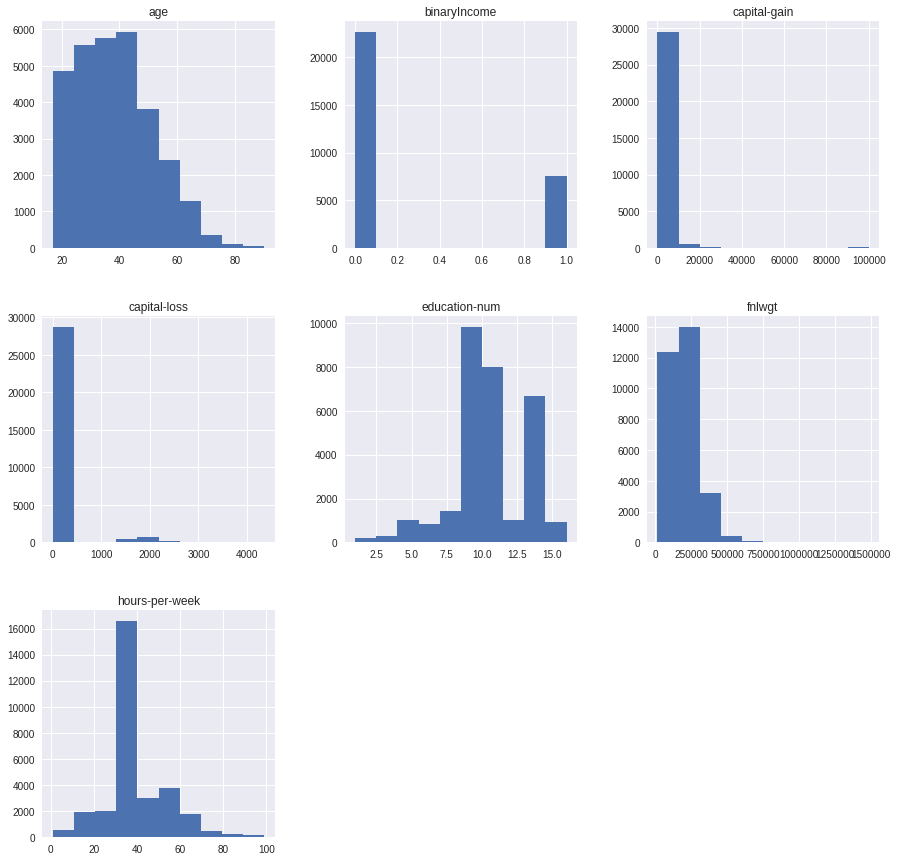

In [0]:
numData.hist(figsize=(15,15))

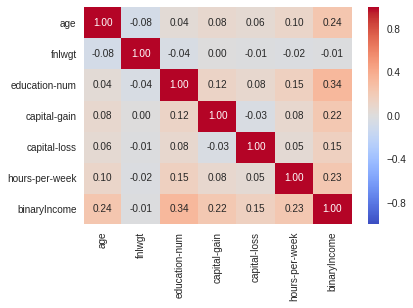

In [0]:
sns.heatmap(numData.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


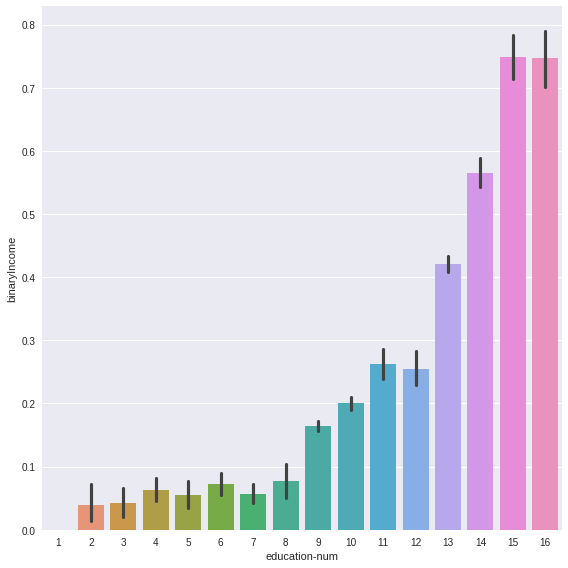

In [0]:
sns.factorplot(x="education-num",y="binaryIncome",data=data,kind="bar",size =8)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


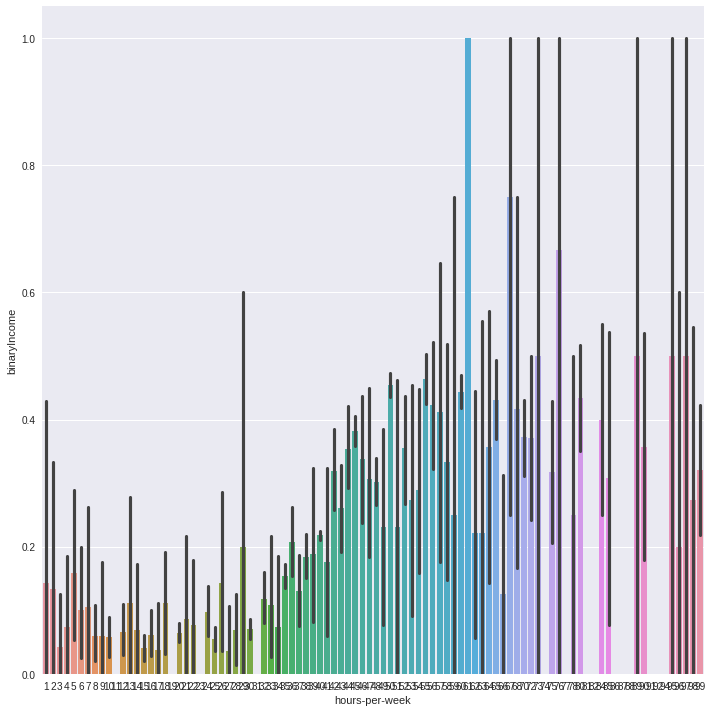

In [0]:
sns.factorplot(x="hours-per-week",y="binaryIncome",data=data,kind="bar",size = 10)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<function matplotlib.pyplot.show>

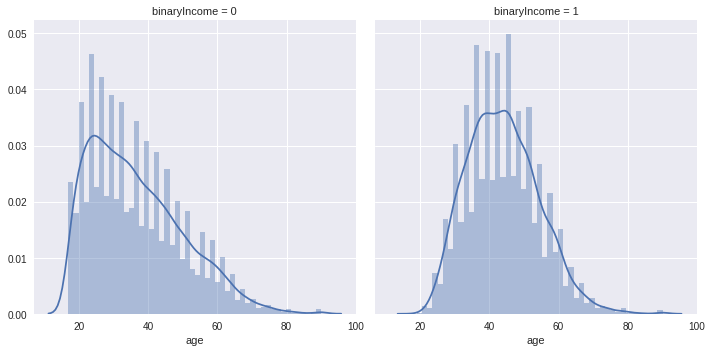

In [0]:
g = sns.FacetGrid(data, col='binaryIncome', size=5)
g = g.map(sns.distplot, "age")
sns.plt.show

###Summary of numerical data analysis


*   Values are on different scales, might need to normalize or standardize data (between -1, 1 or 0, 1? ) before training models
*   Need to perform feature selection/engineering on data, little or no linear correlation between numerical datapoints in dataset
*   Did not show all possible graphs as there were too many, only showed relevant ones
*   There does appear to be a non-linear relationship between income level and age, education-num, hours-per-week
*   More ppl with income <=50K than with >50k
*   Tried to plot relationship between fnlwgt and binaryIncome, there seems to be a bug because KeyError was thrown out each time
 
 Note: fnlwgt describes demographic characteristics of the person, i.e, people with similar fnlwgt are more likely to be in the same demographic



##Categorical Data analysis

want to get the absolute values of income for each category, but also ratio between income values for each categories (number of ppl with income <=50K / total number of ppl)

In [8]:
catData =data.select_dtypes(include=['object'])
catData.head().T

,1,3,4,5,6
workClass,Private,Private,Private,Private,Private
education,HS-grad,7th-8th,Some-college,HS-grad,10th
marital-status,Widowed,Divorced,Separated,Divorced,Separated
occupation,Exec-managerial,Machine-op-inspct,Prof-specialty,Other-service,Adm-clerical
relationship,Not-in-family,Unmarried,Own-child,Unmarried,Unmarried
race,White,White,White,White,White
sex,Female,Female,Female,Female,Male
native-country,United-States,United-States,United-States,United-States,United-States
income,<=50K,<=50K,<=50K,<=50K,<=50K


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


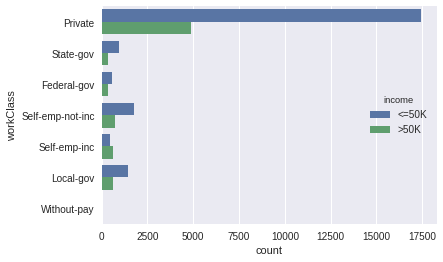

In [0]:
sns.countplot(y='workClass', hue='income', data = catData)


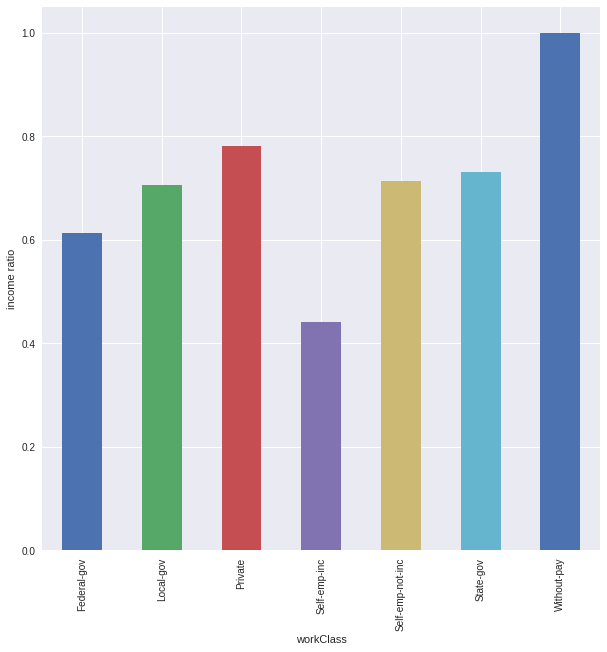

In [10]:
df = pd.DataFrame()
df = catData.loc[catData['income']=='<=50K'].groupby(['workClass']).size()

df1=catData.groupby(['workClass']).size()
df2 = df/df1
ax = df2.plot(kind='bar', figsize=(10, 10))
ax = ax.set_ylabel('income ratio')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


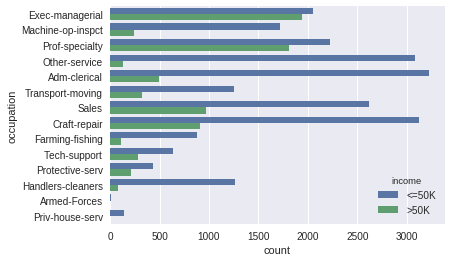

In [0]:
sns.countplot(y='occupation', hue='income', data = catData)

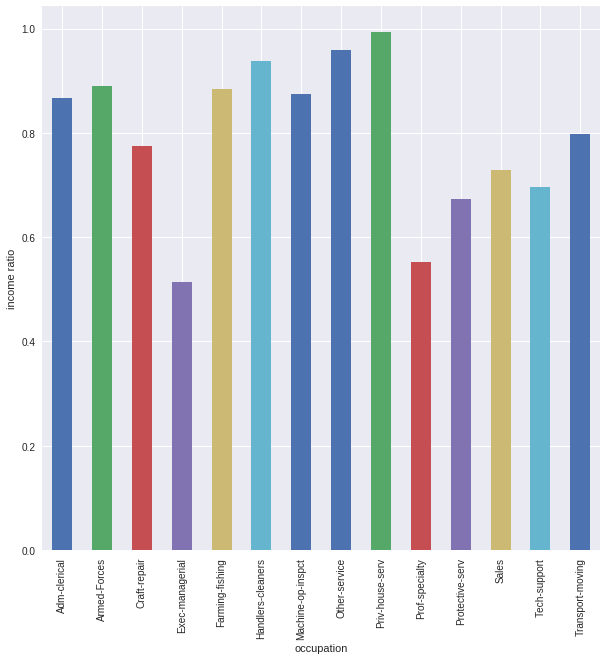

In [11]:
df = pd.DataFrame()
df = catData.loc[catData['income']=='<=50K'].groupby(['occupation']).size()

df1=catData.groupby(['occupation']).size()
df2 = df/df1
ax = df2.plot(kind='bar', figsize=(10, 10))
ax = ax.set_ylabel('income ratio')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


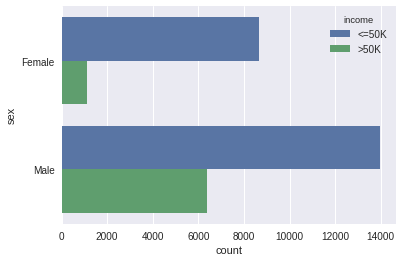

In [0]:
sns.countplot(y='sex', hue='income', data = catData)

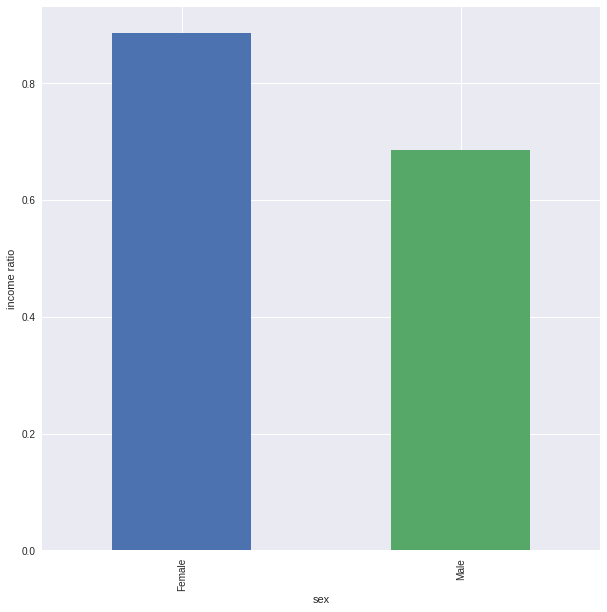

In [12]:
df = pd.DataFrame()
df = catData.loc[catData['income']=='<=50K'].groupby(['sex']).size()

df1=catData.groupby(['sex']).size()
df2 = df/df1
ax = df2.plot(kind='bar', figsize=(10, 10))
ax = ax.set_ylabel('income ratio')

###Summary of categorical data analysis


*   There is appearence of trends between categories and income levels
*   List item




#Prepare data for fitting
First need to standardize/normalize all numerical data, will use standard scaller from sklearn. Normalizes data(fits to normal curve) with mean U and standard deviation S calculated from dataset

In [9]:
scaler = StandardScaler()

sData = pd.DataFrame()
df= pd.DataFrame()
df1= pd.DataFrame()
df1 =numData.reset_index(drop=True)
df =numData.drop('binaryIncome', axis=1)
sData=sData.reset_index()
df=df.reset_index(drop=True)
sData = scaler.fit_transform(df)
columns = ["age", "fnlwgt",  "education-num",
          "capital-gain", "capital-loss", "hours-per-week"]
sData = pd.DataFrame(sData, columns=columns)


sData['binaryIncome'] = df1.binaryIncome


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
numData.tail(), sData.tail()

(       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
 32556   22  310152             10             0             0              40   
 32557   27  257302             12             0             0              38   
 32558   40  154374              9             0             0              40   
 32559   58  151910              9             0             0              40   
 32560   22  201490              9             0             0              20   
 
        binaryIncome  
 32556             0  
 32557             0  
 32558             1  
 32559             0  
 32560             0  ,
             age    fnlwgt  education-num  capital-gain  capital-loss  \
 30157 -1.251511  1.139203      -0.047574     -0.147445     -0.218586   
 30158 -0.870832  0.638972       0.736754     -0.147445     -0.218586   
 30159  0.118931 -0.335252      -0.439738     -0.147445     -0.218586   
 30160  1.489374 -0.358575      -0.439738     -0.147445     -0.218586   
 3

models are to only take in numerical data, need to transform cat data to num data by transforming it into dummy variables

In [10]:
catData = catData.drop('income', axis=1)
dData = pd.DataFrame()
dData = pd.get_dummies(catData.reset_index(drop=True), drop_first=True)
catData.head(1).T, dData.head(1).T

(                              1
 workClass               Private
 education               HS-grad
 marital-status          Widowed
 occupation      Exec-managerial
 relationship      Not-in-family
 race                      White
 sex                      Female
 native-country    United-States,                                            0
 workClass_Local-gov                        0
 workClass_Private                          1
 workClass_Self-emp-inc                     0
 workClass_Self-emp-not-inc                 0
 workClass_State-gov                        0
 workClass_Without-pay                      0
 education_11th                             0
 education_12th                             0
 education_1st-4th                          0
 education_5th-6th                          0
 education_7th-8th                          0
 education_9th                              0
 education_Assoc-acdm                       0
 education_Assoc-voc                        0
 education_Ba

merge the 2 datasets into final dataset

In [0]:
fData = pd.DataFrame()
fData = pd.concat([sData.reset_index(drop=True), dData.reset_index(drop=True)], axis=1)


In [0]:
fData.head().T

next step is to create a train and test dataset, and then seperate labels and feautes

In [0]:

fDataY = pd.DataFrame(fData['binaryIncome'])
fDataX = pd.DataFrame(fData.drop('binaryIncome', axis=1))


In [0]:
X_train, X_test, y_train, y_test = train_test_split( fDataX, fDataY, test_size=0.2, random_state=42)

In [0]:
y_train.info(), y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24129 entries, 18406 to 23654
Data columns (total 1 columns):
binaryIncome    24129 non-null int64
dtypes: int64(1)
memory usage: 377.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6033 entries, 217 to 5687
Data columns (total 1 columns):
binaryIncome    6033 non-null int64
dtypes: int64(1)
memory usage: 94.3 KB


(None, None)

#Fitting Data

##Logistic Regression

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
clear_output()
lr_score=lr.score(X_test, y_test)
lr_score

0.8425327366152826

###Cross Validation

In [42]:
cross_val_model = LogisticRegression(random_state=0)
cv_scores_lr = cross_val_score(cross_val_model, fDataX,  fDataY, cv=5, verbose=True)
clear_output()
print(np.mean(cv_scores_lr))

0.8280281816509658


###Grid Search

In [43]:
#penalty = ['l1', 'l2']
# C is the inverese of regularization parameter
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C = np.logspace(0, 4, 10)


params = dict(C=C, solver=solver)
clf = GridSearchCV(estimator=lr, param_grid = params,cv=5, verbose=True)
gs_lr = clf.fit(fDataX, fDataY)
clear_output()
gs_score_lr=gs_lr.score(X_test, y_test)
gs_score_lr

0.8431957566716393

###Results

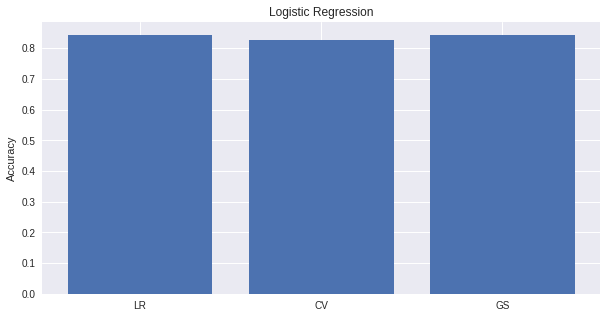

In [76]:
y = [lr_score, np.mean(cv_scores_lr), gs_lr.score(X_test, y_test)]
N = len(y)
x = ('LR', 'CV', 'GS')
plt.subplots(figsize=(10,5))
plt.bar(x, y)
plt.ylabel('Accuracy')
plt.title('Logistic Regression')
 
plt.show()

##Decision Tree

In [70]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
clear_output()
score_dt=dt.score(X_test, y_test)
score_dt

0.8044090833747721

###Cross Validation

In [72]:
cross_val_model = tree.DecisionTreeClassifier()
cv_scores_dt = cross_val_score(cross_val_model, fDataX,  fDataY, cv=5, verbose=True)
clear_output()
print(np.mean(cv_scores_dt))

0.7691148976913361


###Grid Search

In [73]:
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
params = dict(max_depth=depths, min_samples_leaf =num_leafs)
clf = GridSearchCV(estimator=dt, param_grid = params,cv=5, verbose=True)
gs_dt = clf.fit(X_train, y_train)
gs_score_dt=gs_dt.score(X_test, y_test)
clear_output()
gs_score_dt

0.8524780374606332

###Results

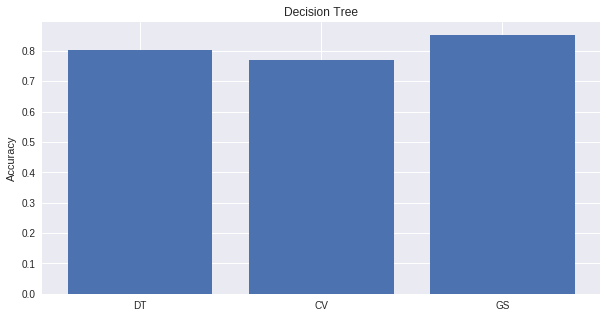

In [75]:
y = [score_dt, np.mean(cv_scores_dt), gs_score_dt]
N = len(y)
x = ('DT', 'CV', 'GS')
plt.subplots(figsize=(10,5))
plt.bar(x, y)
plt.ylabel('Accuracy')
plt.title('Decision Tree')
 
plt.show()

##SVM

In [15]:
clf=svm.SVC()
svm = clf.fit(X_train, y_train)
clear_output()
score_svm=svm.score(X_test, y_test)
score_svm

0.843858776727996

###Cross Validation

In [16]:
from sklearn import svm
cross_val_model = svm.SVC()
cv_scores_svm = cross_val_score(cross_val_model, fDataX,  fDataY, cv=5, verbose=True)
clear_output()
print(np.mean(cv_scores_svm))

0.8283593508905147


###Grid Search

In [19]:
from sklearn import svm
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
params = dict(C=Cs, gamma=gammas)
clf = GridSearchCV(estimator=svm.SVC(), param_grid = params,cv=5, verbose=True)
gs_svm = clf.fit(X_train, y_train)
gs_score_svm=gs_svm.score(X_test, y_test)
clear_output()
gs_score_svm  

0.8470081219956904

###Results

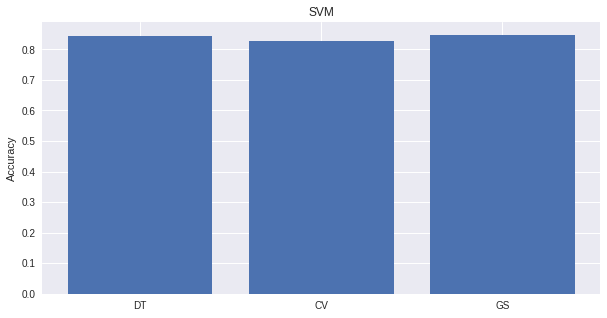

In [22]:
y = [score_svm, np.mean(cv_scores_svm), gs_score_svm]
N = len(y)
x = ('DT', 'CV', 'GS')
plt.subplots(figsize=(10,5))
plt.bar(x, y)
plt.ylabel('Accuracy')
plt.title('SVM')
 
plt.show()

##KNN

In [17]:
knn = KNN()
knn.fit(X_train, y_train)
score_knn = knn.score(X_test, y_test)
clear_output()
score_knn

0.8264545002486325

###Cross Validation

In [18]:

cross_val_model = KNN()
cv_scores_knn = cross_val_score(cross_val_model, fDataX,  fDataY, cv=5, verbose=True)
clear_output()
print(np.mean(cv_scores_knn))

0.8174525720617336


###Grid Search

In [34]:
k_range=(np.floor((np.linspace(5, np.sqrt(len(fData)), 10)))).astype(int)
params = dict(n_neighbors = k_range)
clf = GridSearchCV(estimator=knn, param_grid = params,cv=5, verbose=True)
gs_knn = clf.fit(X_train, y_train)
gs_score_knn=gs_knn.score(X_test, y_test)
clear_output()
gs_score_knn

0.8359025360517156

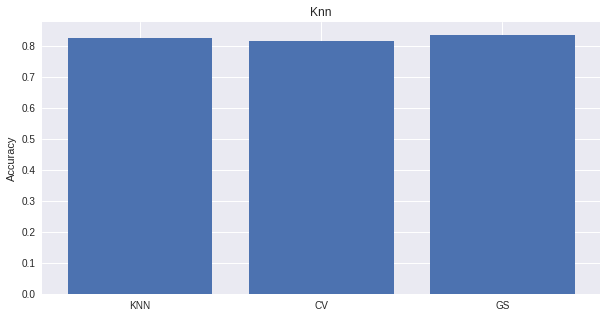

In [35]:
y = [score_knn, np.mean(cv_scores_knn), gs_score_knn]
N = len(y)
x = ('KNN', 'CV', 'GS')
plt.subplots(figsize=(10,5))
plt.bar(x, y)
plt.ylabel('Accuracy')
plt.title('Knn')
 
plt.show()